In [1]:
# http://soft-matter.github.io/trackpy/v0.4.2/tutorial/walkthrough.html

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import pims
import trackpy as tp

# Reading the data

Frame([[319, 270, 262, ..., 282, 255, 266],
       [277, 244, 289, ..., 274, 263, 254],
       [323, 271, 272, ..., 298, 283, 280],
       ...,
       [323, 257, 294, ..., 279, 281, 276],
       [296, 308, 284, ..., 282, 277, 252],
       [292, 291, 274, ..., 269, 255, 265]], dtype=uint16)
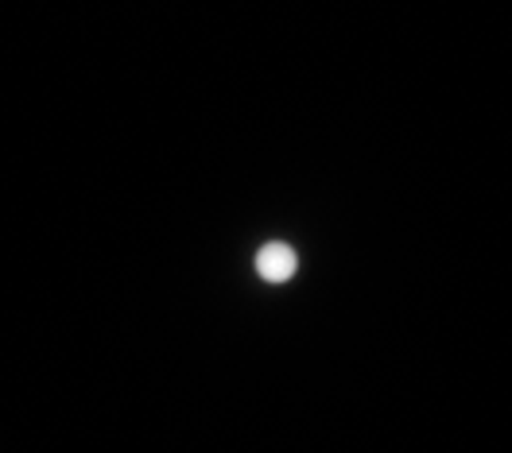

In [2]:
frames = pims.open('./regreg/SD574_Slide6a_Nwk0_WASp5_Dap5_time_80min_002-1_Reg_Reg.tif') # change this to desired file name
frames[1]
# even numbers are droplet
# odd numbers are particle

# Locating features

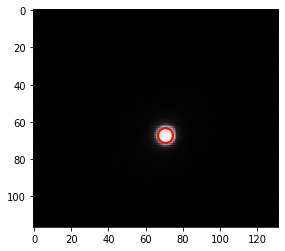

<AxesSubplot:>

In [3]:
f = tp.locate(frames[1], 17, minmass=10000) #17 pixels seems to be a good estimate of the feature size
tp.annotate(f, frames[1])

In [4]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
7,67.369366,70.714523,683644.1906,3.539106,0.017433,11322.33666,1525861.0,0.001957,1


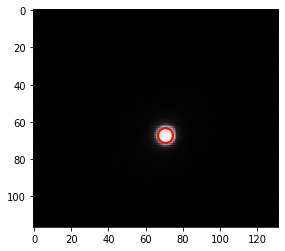

<AxesSubplot:>

In [5]:
tp.annotate(f, frames[1])

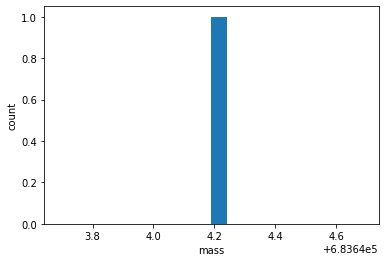

In [6]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

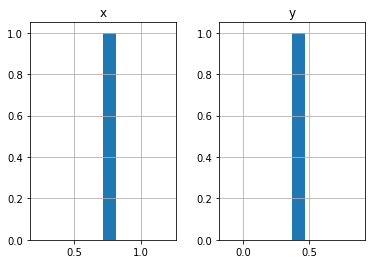

In [7]:
tp.subpx_bias(f)

In [8]:
f = tp.batch(frames[1::2], 17, minmass=10000)

Frame 509: 1 features


# Linking features into particle trajectories

In [9]:
t = tp.link(f, 5, memory=3)

Frame 509: 1 trajectories present.


In [10]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,67.369366,70.714523,683644.190600,3.539106,0.017433,11322.336660,1525861.0,0.001957,1,0
1,66.623570,70.855932,686614.567643,3.531604,0.018608,11414.963965,1527288.0,0.001599,3,0
2,66.787613,71.052700,687726.577583,3.511456,0.018832,11491.873172,1531560.0,0.001917,5,0
3,68.793741,70.591202,694178.716811,3.566291,0.025884,11484.732853,1541501.0,0.001884,7,0
4,67.465490,71.428326,689364.480802,3.578784,0.019843,11428.954104,1529985.0,0.001878,9,0


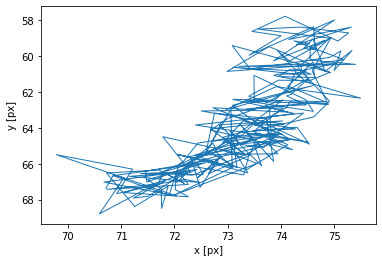

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [11]:
plt.figure()
tp.plot_traj(t)

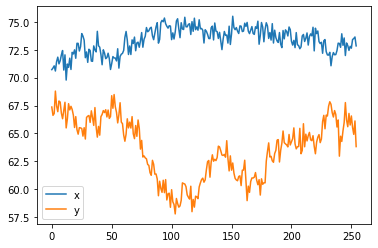

In [12]:
t['x'].plot(label='x')
t['y'].plot(label='y')
plt.legend()
plt.show()

### Computing drift

In [30]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,67.369366,70.714523,683644.190600,3.539106,0.017433,11322.336660,1525861.0,0.001957,1,0
1,66.623570,70.855932,686614.567643,3.531604,0.018608,11414.963965,1527288.0,0.001599,3,0
2,66.787613,71.052700,687726.577583,3.511456,0.018832,11491.873172,1531560.0,0.001917,5,0
3,68.793741,70.591202,694178.716811,3.566291,0.025884,11484.732853,1541501.0,0.001884,7,0
4,67.465490,71.428326,689364.480802,3.578784,0.019843,11428.954104,1529985.0,0.001878,9,0


In [29]:
# This doesn't work for some reason (issue most likely related to in-built methods within trackpy library)
d = tp.compute_drift(t)
d.head()

,y,x
frame,,


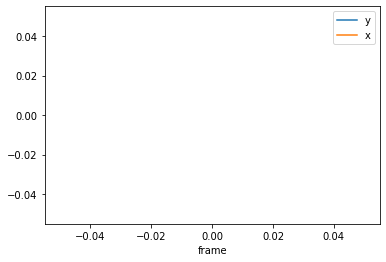

In [27]:
d.plot()
plt.show()

### Removing overall drift

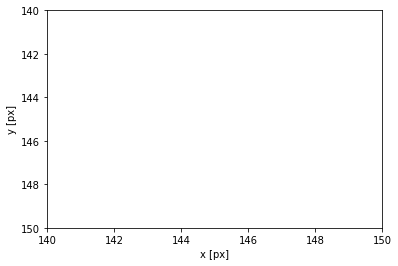

In [14]:
tm = tp.subtract_drift(t.copy(), d)

plt.xlim([140, 150])
plt.ylim([140, 150])
ax = tp.plot_traj(tm)
plt.show()

# Analyzing trajectories

## Mean Squared Displacement of Individal Probes

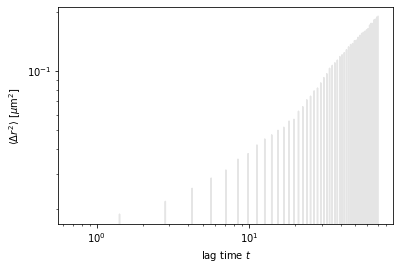

In [15]:
im = tp.imsd(tm, .1083, 1.41843971631)  # microns per pixel = .1083, frames per second = 1.41843971631

fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

## Ensemble Mean Squared Displacement

[Text(0, 0.5, '$\\langle \\Delta r^2 \\rangle$ [$\\mu$m$^2$]'),
 Text(0.5, 0, 'lag time $t$')]

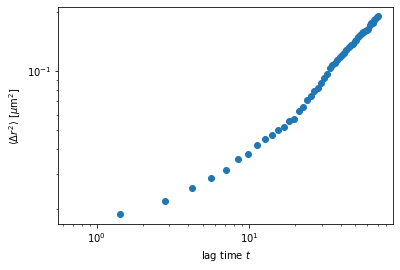

In [16]:
em = tp.emsd(tm, .1083, 1.41843971631)

fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')

/Users/danielhariyanto/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/danielhariyanto/Library/Python/3.8/lib/python/site-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


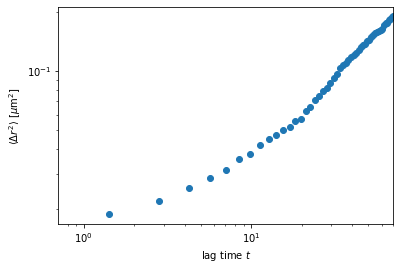

,n,A
msd,NaN,NaN


In [17]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$')
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]